# Praca domowa nr 6

## Wstęp

Celem pracy domowej nr 6 było zaimplementowanie rozwiązania pracy domowej nr 2 w Pythonie za pomocą pakietu *matplotlib* lub *seaborn*- zdecydowałem się zastosować pierwszy z nich. Dla przypomnienia i jasności wykonywanych czynności przypomnę, że naszym zadaniem było wybranie pewnej wizualizacji znalezionej w internecie i poprawienie jej.

Wykresem, który postanowiłem poprawić, jest wizualizacja ze strony internetowej gazety *The Philadelphia Inquirer*- można ją odnaleźć, wchodząc w poniższy link:

https://www.inquirer.com/news/covid-vaccine-supply-pa-suburbs-doh-share-20210309.html

Prezentuje się ona następująco:

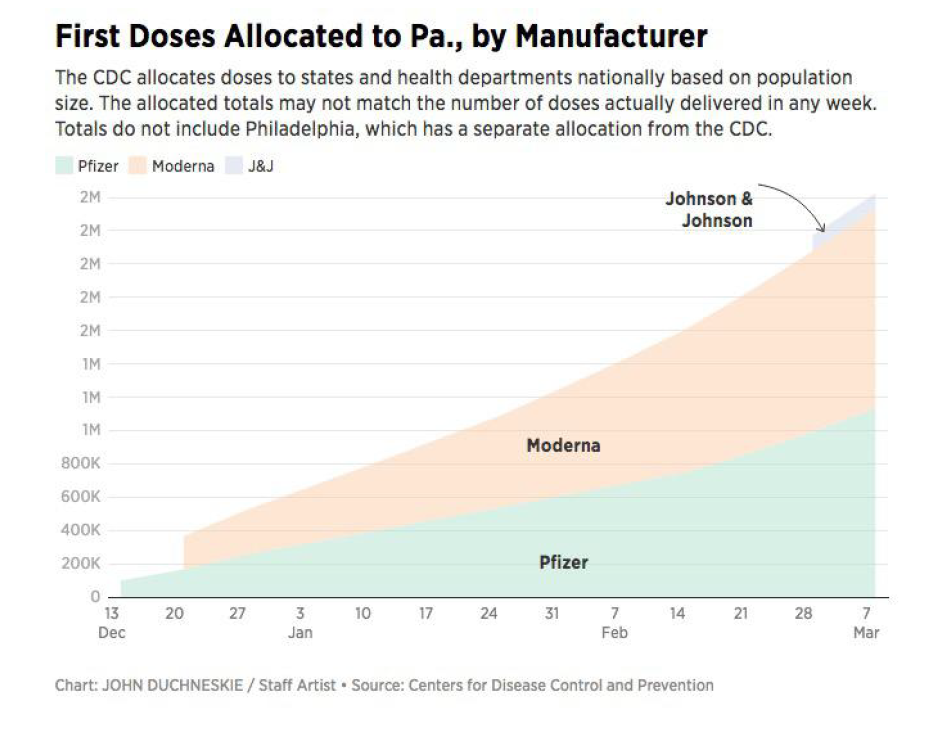

## Import oraz obróbka danych
Poniżej zamieszczam kod niezbędny do zaimportowania danych i ich obróbki, by móc utworzyć poprawioną wersję wizualizacji.

In [226]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

path1 = "Dane o szczepionkach/J&J.xlsx"
path2 = "Dane o szczepionkach/Moderna.xlsx"
path3 = "Dane o szczepionkach/Pfizer.xlsx"

df_jj = pd.read_excel(path1)
df_moderna = pd.read_excel(path2)
df_pfizer = pd.read_excel(path3)

In [212]:
df_week_jj = df_jj.loc[df_jj['Jurisdiction']=='Pennsylvania', ['Week of Allocations','1st Dose Allocations']]\
    .rename(columns={'Week of Allocations':'Week','1st Dose Allocations': 'JJ'})\
    .iloc[::-1]

df_week_jj.JJ = df_week_jj['JJ'].cumsum()

df_week_moderna = df_moderna.loc[df_moderna['Jurisdiction']=='Pennsylvania', ['Week of Allocations','1st Dose Allocations']]\
    .rename(columns={'Week of Allocations':'Week','1st Dose Allocations': 'Moderna'})\
    .iloc[::-1]

df_week_moderna.Moderna = df_week_moderna['Moderna'].cumsum()

df_week_pfizer = df_pfizer.loc[df_pfizer['Jurisdiction']=='Pennsylvania', ['Week of Allocations','1st Dose Allocations']]\
    .rename(columns={'Week of Allocations':'Week','1st Dose Allocations': 'Pfizer'})\
    .iloc[::-1]

df_week_pfizer.Pfizer = df_week_pfizer['Pfizer'].cumsum()


data = {
    "Week": df_week_pfizer['Week'],
    'J&J': jj_cumsum,
    'Moderna': moderna_cumsum,
    "Pfizer": pfizer_cumsum
}

data = df_week_pfizer.merge(df_week_moderna, on='Week', how='left')\
    .merge(df_week_jj, on='Week',how='left')\
    .fillna(0)\
    .rename(columns={'JJ':'J&J'})\
    .iloc[::-1]

df_alloc_dos = pd.DataFrame(data).fillna(0).iloc[::-1]
df_alloc_dos['Total'] = df_alloc_dos[['J&J','Moderna','Pfizer']].sum(axis=1)

## Kod do utworzenia poprawionej wizualizacji
Poniżej znajduje się kod, za pomocą którego powstaje poprawiona wersja wizualizacji.

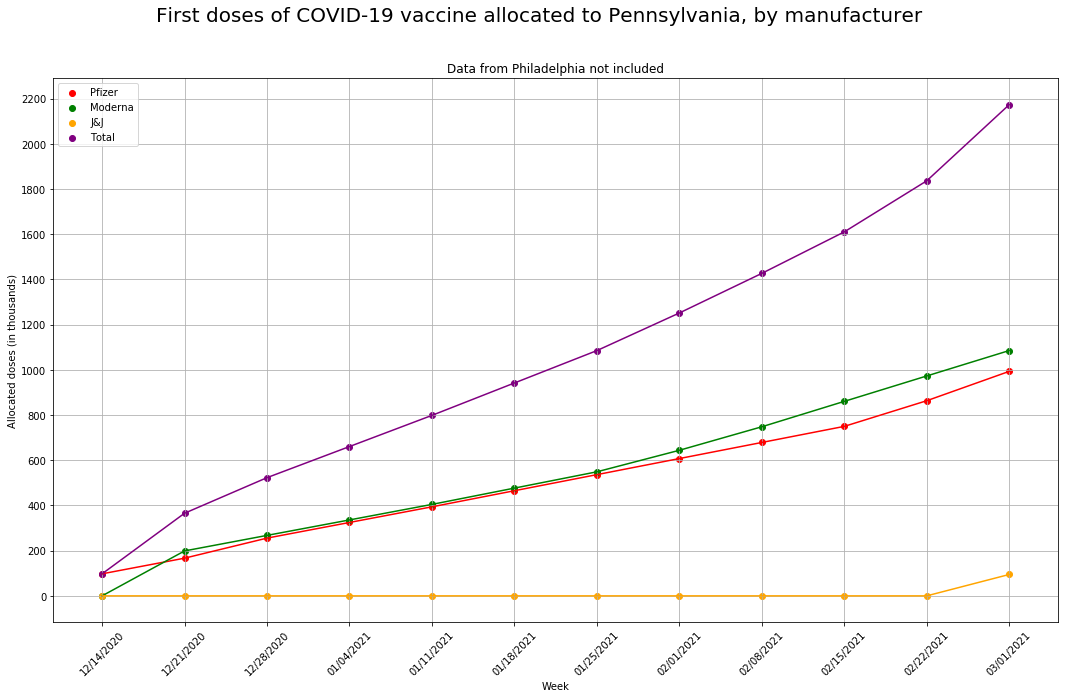

In [228]:
plt.figure(figsize=(18, 10))

manufacturer = df_alloc_dos.columns[1:5]

colormap = {
    'J&J': 'orange',
    'Moderna': 'green',
    'Pfizer': 'red',
    'Total': 'purple'    
}

x = df_alloc_dos[0:12]['Week']

for manuf in manufacturer:
    y= df_alloc_dos[0:12][manuf]
    plt.scatter(x,y, c=colormap[manuf], label=manuf)
    plt.plot(x,y,c=colormap[manuf])

plt.legend()

plt.suptitle('First doses of COVID-19 vaccine allocated to Pennsylvania, by manufacturer', fontsize=20)
plt.title('Data from Philadelphia not included')
plt.xlabel('Week')
plt.ylabel('Allocated doses (in thousands)')

plt.xticks(rotation=45)

ay = plt.gca()
ay.set_yticks(np.arange(0, 2400, 200).tolist())

plt.grid()

plt.show()

## Podsumowanie

Powyższa propozycja poprawy wizualizacji pozwala względem pierwotnego wykresu:

1. Odczytać dokładne (co do 200 tysięcy) wartości na osi OY, które różnią się między sobą o stałą wartość (pierwotny wykres ma niedokładne wartości i nieregularne różnice).


2. Uświadomić odbiorcę o dyskretnym charakterze danych, których wartości zostały zaznaczone punktami, a następnie połączone ciągłą linią, by w łatwy sposób ukazać tendencje wzrostowe (pierwotna wizualizacja prezentowała w pewnym sensie wykres gęstości, jednak wartości na osi OY były dopasowane do wykresu punktowego).


3. Odczytać, kiedy dany producent nie dostarczał żadnych szczepionek i w którym momencie rozpoczął ich dystrybucję, a także dokładnie określić jego udział w całkowitej liczbie wydanych próbek w każdym tygodniu (pierwotny wykres sumy wszystkich próbek miał wydzielone kolorami obszary, które tylko w bardzo poglądowy sposób pozwalały określić, jaka część szczepionek pochodzi od konkretnego producenta).


4. Odczytać całkowitą liczbę dawek będącą sumą dawek dostarczonych przez każdego z producentów.


5. Pominąć przetwarzanie przez odbiorcę nadmiernych informacji zawartych w podtytule, które utrudniają jego wstępny odbiór i pogarszają czytelność całego wykresu.